
📈 COMPARADOR DE RENDIMIENTO: SPY vs ACTIVO

🔍 Analizando: SPY vs AAPL
📅 Período: 365 días

Descargando datos...
✓ Datos descargados exitosamente


📊 COMPARACIÓN DE RENDIMIENTO

📅 Período analizado: 365 días (12.2 meses)
🗓️  Desde: 21/01/2025 hasta 20/01/2026

------------------------------------------------------------------------------------------
RENDIMIENTOS:
------------------------------------------------------------------------------------------

SPY (S&P 500)                  📈    13.06%
  └─ Precio inicial:  USD     603.05
  └─ Precio final:    USD     681.83

AAPL                           📈    14.05%
  └─ Precio inicial:  USD     222.64
  └─ Precio final:    USD     253.93

🏆 RESULTADO

✨ AAPL SUPERÓ al SPY por 0.99 puntos porcentuales
   AAPL: +14.05% vs SPY: +13.06%

📊 AAPL rindió 1.08x veces más que SPY


📊 Generando gráfico...
✓ Gráfico guardado: comparacion_SPY_vs_AAPL_365dias_simple.png
📊 Generando imagen completa con resumen...
✓ Imagen completa guardada: comparacion_

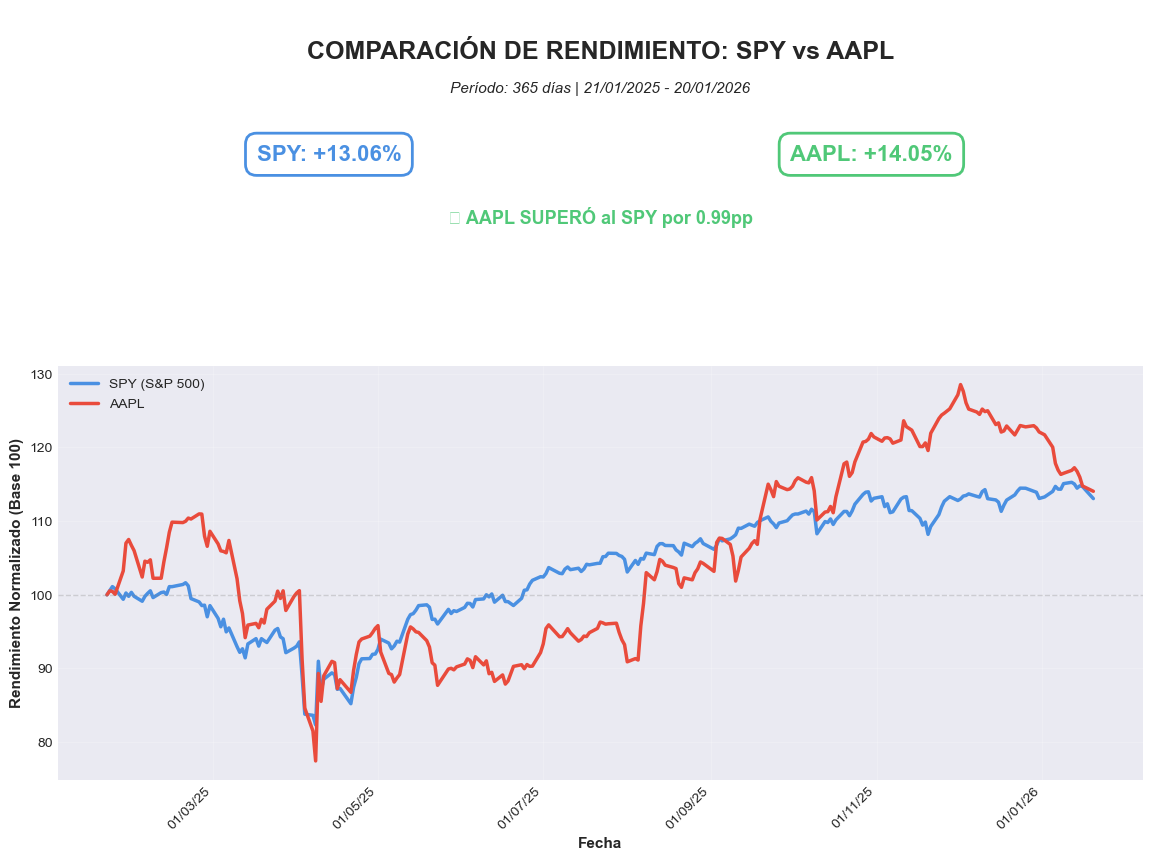

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# ============================================
# PARÁMETROS DE ENTRADA - MODIFICÁ ESTOS
# ============================================
DIAS_ANALISIS = 365  # Período de análisis (30, 60, 90, 180, 365, etc.)
TICKER_COMPARAR = 'AAPL'  # Ticker a comparar vs SPY (ej: 'AAPL', 'TSLA', 'GGAL', 'BTC-USD')

# ============================================
# CONFIGURACIÓN DE GRÁFICOS
# ============================================
plt.style.use('seaborn-v0_8-darkgrid')
COLORES = {
    'SPY': '#4A90E2',      # Azul
    'COMPARAR': '#E94B3C',  # Rojo
    'GANADOR': '#50C878',   # Verde
    'PERDEDOR': '#FF6B6B'   # Rojo claro
}

# ============================================
# FUNCIONES
# ============================================

def obtener_datos_rendimiento(ticker, dias):
    fecha_fin = datetime.now()
    fecha_inicio = fecha_fin - timedelta(days=dias)
    
    try:
        data = yf.download(ticker, start=fecha_inicio, end=fecha_fin, progress=False, auto_adjust=False)
        
        if len(data) < 2:
            return None
        
        # Calcular rendimiento normalizado (base 100)
        precios = data['Close']
        rendimiento_norm = (precios / precios.iloc[0]) * 100
        
        return {
            'datos': rendimiento_norm,
            'precio_inicial': float(precios.iloc[0]),
            'precio_final': float(precios.iloc[-1]),
            'rendimiento_pct': ((float(precios.iloc[-1]) - float(precios.iloc[0])) / float(precios.iloc[0])) * 100,
            'fechas': data.index
        }
    except Exception as e:
        print(f"❌ Error obteniendo datos de {ticker}: {str(e)}")
        return None


def crear_grafico_comparativo(datos_spy, datos_comp, ticker_comp, dias):
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plotear líneas
    ax.plot(datos_spy['fechas'], datos_spy['datos'], 
            label='SPY (S&P 500)', linewidth=2.5, color=COLORES['SPY'])
    ax.plot(datos_comp['fechas'], datos_comp['datos'], 
            label=f'{ticker_comp}', linewidth=2.5, color=COLORES['COMPARAR'])
    
    # Línea base en 100
    ax.axhline(y=100, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    
    # Configurar ejes
    ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
    ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12, fontweight='bold')
    ax.set_title(f'Comparación de Rendimiento: SPY vs {ticker_comp}\n({dias} días)', 
                 fontsize=16, fontweight='bold', pad=20)
    
    # Formato de fechas en eje X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45, ha='right')
    
    # Grid
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
    # Leyenda
    ax.legend(loc='best', fontsize=11, framealpha=0.9)
    
    # Ajustar layout
    plt.tight_layout()
    
    return fig


def generar_resumen(datos_spy, datos_comp, ticker_comp, dias):
    
    rend_spy = datos_spy['rendimiento_pct']
    rend_comp = datos_comp['rendimiento_pct']
    diferencia = rend_comp - rend_spy
    
    ganador = ticker_comp if rend_comp > rend_spy else 'SPY'
    
    print("\n" + "=" * 90)
    print("📊 COMPARACIÓN DE RENDIMIENTO")
    print("=" * 90)
    print(f"\n📅 Período analizado: {dias} días ({dias/30:.1f} meses)")
    print(f"🗓️  Desde: {datos_spy['fechas'][0].strftime('%d/%m/%Y')} hasta {datos_spy['fechas'][-1].strftime('%d/%m/%Y')}")
    
    print("\n" + "-" * 90)
    print("RENDIMIENTOS:")
    print("-" * 90)
    
    emoji_spy = "📈" if rend_spy > 0 else "📉"
    emoji_comp = "📈" if rend_comp > 0 else "📉"
    
    print(f"\n{'SPY (S&P 500)':<30} {emoji_spy} {rend_spy:>8.2f}%")
    print(f"  └─ Precio inicial:  USD {datos_spy['precio_inicial']:>10.2f}")
    print(f"  └─ Precio final:    USD {datos_spy['precio_final']:>10.2f}")
    
    print(f"\n{ticker_comp:<30} {emoji_comp} {rend_comp:>8.2f}%")
    print(f"  └─ Precio inicial:  USD {datos_comp['precio_inicial']:>10.2f}")
    print(f"  └─ Precio final:    USD {datos_comp['precio_final']:>10.2f}")
    
    print("\n" + "=" * 90)
    print("🏆 RESULTADO")
    print("=" * 90)
    
    if ganador == ticker_comp:
        print(f"\n✨ {ticker_comp} SUPERÓ al SPY por {abs(diferencia):.2f} puntos porcentuales")
        print(f"   {ticker_comp}: {rend_comp:+.2f}% vs SPY: {rend_spy:+.2f}%")
    else:
        print(f"\n🎯 SPY SUPERÓ a {ticker_comp} por {abs(diferencia):.2f} puntos porcentuales")
        print(f"   SPY: {rend_spy:+.2f}% vs {ticker_comp}: {rend_comp:+.2f}%")
    
    # Ratio de rendimiento
    if rend_spy != 0:
        ratio = rend_comp / rend_spy
        if ratio > 1:
            print(f"\n📊 {ticker_comp} rindió {ratio:.2f}x veces más que SPY")
        else:
            print(f"\n📊 SPY rindió {1/ratio:.2f}x veces más que {ticker_comp}")
    
    print("\n" + "=" * 90)
    
    return {
        'ganador': ganador,
        'diferencia': diferencia,
        'rend_spy': rend_spy,
        'rend_comp': rend_comp
    }


def crear_imagen_resumen(resumen, datos_spy, datos_comp, ticker_comp, dias, fig_grafico):
    
    # Crear figura con subplots
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(3, 1, height_ratios=[1, 0.1, 2], hspace=0.3)
    
    # Panel superior: Resumen textual
    ax_texto = fig.add_subplot(gs[0])
    ax_texto.axis('off')
    
    rend_spy = resumen['rend_spy']
    rend_comp = resumen['rend_comp']
    ganador = resumen['ganador']
    diferencia = resumen['diferencia']
    
    # Título principal
    titulo = f"COMPARACIÓN DE RENDIMIENTO: SPY vs {ticker_comp}"
    ax_texto.text(0.5, 0.85, titulo, ha='center', va='top', 
                  fontsize=18, fontweight='bold', transform=ax_texto.transAxes)
    
    # Período
    periodo_texto = f"Período: {dias} días | {datos_spy['fechas'][0].strftime('%d/%m/%Y')} - {datos_spy['fechas'][-1].strftime('%d/%m/%Y')}"
    ax_texto.text(0.5, 0.65, periodo_texto, ha='center', va='top',
                  fontsize=11, transform=ax_texto.transAxes, style='italic')
    
    # Resultados
    resultado_spy = f"SPY: {rend_spy:+.2f}%"
    resultado_comp = f"{ticker_comp}: {rend_comp:+.2f}%"
    
    color_spy = COLORES['GANADOR'] if ganador == 'SPY' else COLORES['SPY']
    color_comp = COLORES['GANADOR'] if ganador == ticker_comp else COLORES['COMPARAR']
    
    ax_texto.text(0.25, 0.35, resultado_spy, ha='center', va='top',
                  fontsize=16, fontweight='bold', color=color_spy,
                  transform=ax_texto.transAxes,
                  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=color_spy, linewidth=2))
    
    ax_texto.text(0.75, 0.35, resultado_comp, ha='center', va='top',
                  fontsize=16, fontweight='bold', color=color_comp,
                  transform=ax_texto.transAxes,
                  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=color_comp, linewidth=2))
    
    # Ganador
    if ganador == ticker_comp:
        ganador_texto = f"🏆 {ticker_comp} SUPERÓ al SPY por {abs(diferencia):.2f}pp"
    else:
        ganador_texto = f"🏆 SPY SUPERÓ a {ticker_comp} por {abs(diferencia):.2f}pp"
    
    ax_texto.text(0.5, 0.05, ganador_texto, ha='center', va='top',
                  fontsize=13, fontweight='bold', color=COLORES['GANADOR'],
                  transform=ax_texto.transAxes)
    
    # Panel del medio: espacio
    ax_espacio = fig.add_subplot(gs[1])
    ax_espacio.axis('off')
    
    # Panel inferior: Gráfico
    ax_grafico = fig.add_subplot(gs[2])
    
    # Copiar el gráfico
    ax_grafico.plot(datos_spy['fechas'], datos_spy['datos'], 
                    label='SPY (S&P 500)', linewidth=2.5, color=COLORES['SPY'])
    ax_grafico.plot(datos_comp['fechas'], datos_comp['datos'], 
                    label=f'{ticker_comp}', linewidth=2.5, color=COLORES['COMPARAR'])
    ax_grafico.axhline(y=100, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    
    ax_grafico.set_xlabel('Fecha', fontsize=11, fontweight='bold')
    ax_grafico.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=11, fontweight='bold')
    ax_grafico.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
    ax_grafico.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax_grafico.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax_grafico.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax_grafico.legend(loc='best', fontsize=10, framealpha=0.9)
    
    return fig


# ============================================
# EJECUCIÓN PRINCIPAL
# ============================================

if __name__ == "__main__":
    print("\n" + "=" * 90)
    print("📈 COMPARADOR DE RENDIMIENTO: SPY vs ACTIVO")
    print("=" * 90)
    print(f"\n🔍 Analizando: SPY vs {TICKER_COMPARAR}")
    print(f"📅 Período: {DIAS_ANALISIS} días\n")
    
    # Obtener datos
    print("Descargando datos...")
    datos_spy = obtener_datos_rendimiento('SPY', DIAS_ANALISIS)
    datos_comparar = obtener_datos_rendimiento(TICKER_COMPARAR, DIAS_ANALISIS)
    
    if datos_spy is None or datos_comparar is None:
        print("\n❌ No se pudieron obtener los datos necesarios")
        exit()
    
    print("✓ Datos descargados exitosamente\n")
    
    # Generar resumen
    resumen = generar_resumen(datos_spy, datos_comparar, TICKER_COMPARAR, DIAS_ANALISIS)
    
    # Crear gráfico simple
    print("\n📊 Generando gráfico...")
    fig_simple = crear_grafico_comparativo(datos_spy, datos_comparar, TICKER_COMPARAR, DIAS_ANALISIS)
    archivo_simple = f'comparacion_SPY_vs_{TICKER_COMPARAR}_{DIAS_ANALISIS}dias_simple.png'
    fig_simple.savefig(archivo_simple, dpi=300, bbox_inches='tight')
    print(f"✓ Gráfico guardado: {archivo_simple}")
    plt.close(fig_simple)  # Cerrar para no mostrar
    
    # Crear imagen con resumen
    print("📊 Generando imagen completa con resumen...")
    fig_completa = crear_imagen_resumen(resumen, datos_spy, datos_comparar, 
                                        TICKER_COMPARAR, DIAS_ANALISIS, fig_simple)
    archivo_completo = f'comparacion_SPY_vs_{TICKER_COMPARAR}_{DIAS_ANALISIS}dias.png'
    fig_completa.savefig(archivo_completo, dpi=300, bbox_inches='tight')
    print(f"✓ Imagen completa guardada: {archivo_completo}")
    
    plt.show()